In [ ]:
!pip install 'git+https://github.com/salesforce/LAVIS.git'

In [1]:
import torch

from PIL import Image
from lavis.models import load_model_and_preprocess

/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/usr/local/lib/python3.10/dist-packages/diffusers/models/cross_attention.py:30: FutureWarning: Importing from cross_attention is deprecated. Please import from diffusers.models.attention_processor instead.
  deprecate(


In [2]:
torch.cuda.is_available()

True

In [3]:
model, vis_preprocess, txt_preprocess = load_model_and_preprocess("blip_diffusion", "base", device="cuda", is_eval=True)

Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
Cannot initialize model with low cpu memory usage because `accelerate` was not found in the environment. Defaulting to `low_cpu_mem_usage=False`. It is strongly recommended to install `accelerate` for faster and less memory-intense model loading. You can do so with: 
```
pip install accelerate
```
.
/usr/local/lib/python3.10/dist-packages/diffusers/configuration_utils.py:217: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'diffusers.schedulers.scheduling_ddpm.DDPMScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionalit

No ctx_embeddings_cache found in /root/.cache/torch/hub/checkpoints/blip-diffusion


### Description
This demo shows how to render different renditions of the given subject in a zero-shot setup.

(1) extracting BLIP-2 embeddings on ``cond_subject`` and ``cond_image``.

(2) Generating on prompts: "A ``${BLIP-2 embedding} ${tgt_subject} ${text_prompt}``".

### Tips
``tgt_subject`` can be a different subject from the ``cond_subject``. For example, if ``cond_subject="dog"`` (and you use a dog image as condition), and ``tgt_subject=="tiger"``, you'd expect the model to generate a tiger that looks like this particular dog. 

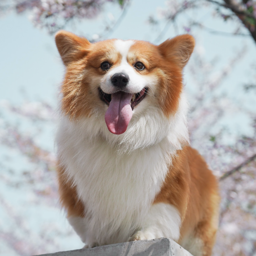

In [4]:
cond_subject = "dog"
tgt_subject = "dog"
# prompt = "painting by van gogh"
text_prompt = "swimming underwater"

cond_subjects = [txt_preprocess["eval"](cond_subject)]
tgt_subjects = [txt_preprocess["eval"](tgt_subject)]
text_prompt = [txt_preprocess["eval"](text_prompt)]

cond_image = Image.open("../images/dog.png").convert("RGB")
display(cond_image.resize((256, 256)))

cond_images = vis_preprocess["eval"](cond_image).unsqueeze(0).cuda()


In [5]:
samples = {
    "cond_images": cond_images,
    "cond_subject": cond_subjects,
    "tgt_subject": tgt_subjects,
    "prompt": text_prompt,
}

/export/home/workspace/LAVIS-latest/LAVIS/lavis/models/blip_diffusion_models/blip_diffusion.py:240: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  (1, self.unet.in_channels, height // 8, width // 8),
/export/home/workspace/LAVIS-latest/LAVIS/lavis/models/blip_diffusion_models/blip_diffusion.py:246: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  self.unet.in_channels,
100%|██████████| 51/51 [00:03<00:00, 13.61it/s]


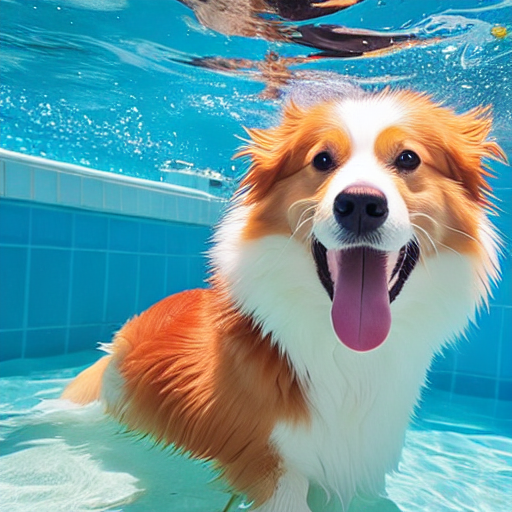

100%|██████████| 51/51 [00:03<00:00, 14.02it/s]


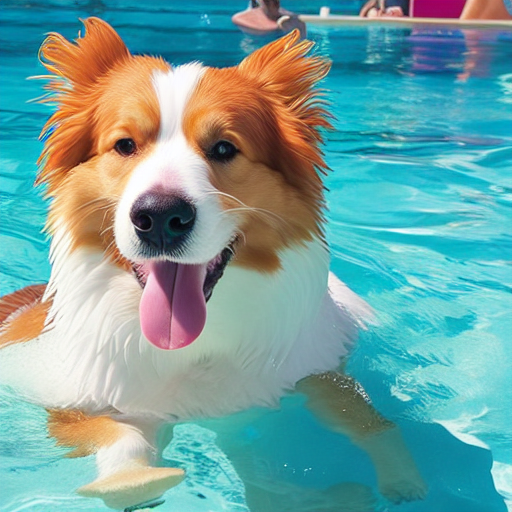

100%|██████████| 51/51 [00:03<00:00, 14.02it/s]


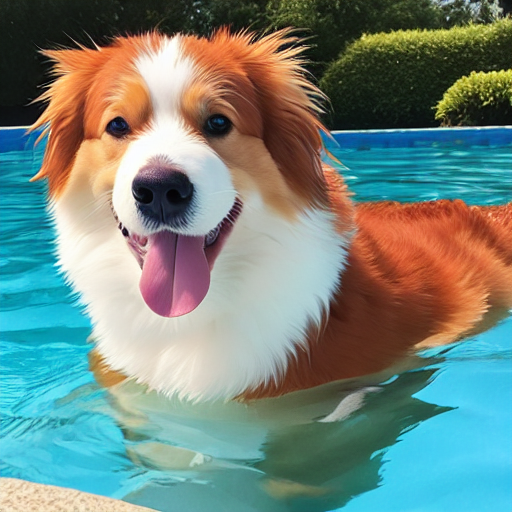

100%|██████████| 51/51 [00:03<00:00, 14.00it/s]


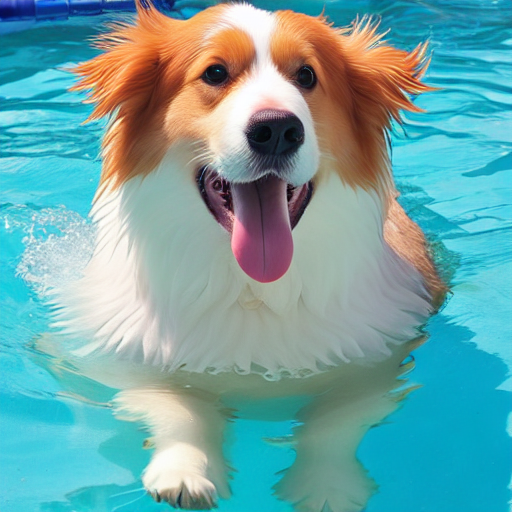

In [6]:
num_output = 4

iter_seed = 88888
guidance_scale = 7.5
num_inference_steps = 50
negative_prompt = "over-exposure, under-exposure, saturated, duplicate, out of frame, lowres, cropped, worst quality, low quality, jpeg artifacts, morbid, mutilated, out of frame, ugly, bad anatomy, bad proportions, deformed, blurry, duplicate"

for i in range(num_output):
    output = model.generate(
        samples,
        seed=iter_seed + i,
        guidance_scale=guidance_scale,
        num_inference_steps=num_inference_steps,
        neg_prompt=negative_prompt,
        height=512,
        width=512,
    )

    display(output[0])
